In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


/home/n/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=1024,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 160us/step - loss: 0.5694 - acc: 0.6950 - val_loss: 0.4289 - val_acc: 0.8242
Epoch 2/10
15000/15000 [==============================] - 1s 67us/step - loss: 0.3509 - acc: 0.8663 - val_loss: 0.3212 - val_acc: 0.8786
Epoch 3/10
15000/15000 [==============================] - 1s 67us/step - loss: 0.2533 - acc: 0.9092 - val_loss: 0.2875 - val_acc: 0.8866
Epoch 4/10
15000/15000 [==============================] - 1s 68us/step - loss: 0.1897 - acc: 0.9327 - val_loss: 0.2924 - val_acc: 0.8865
Epoch 5/10
15000/15000 [==============================] - 1s 75us/step - loss: 0.1671 - acc: 0.9400 - val_loss: 0.2833 - val_acc: 0.8874
Epoch 6/10
15000/15000 [==============================] - 1s 67us/step - loss: 0.1282 - acc: 0.9549 - val_loss: 0.3784 - val_acc: 0.8598
Epoch 7/10
15000/15000 [==============================] - 1s 68us/step - loss: 0.1303 - acc: 0.9538 - val_loss: 0.3297 - val_ac

In [6]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

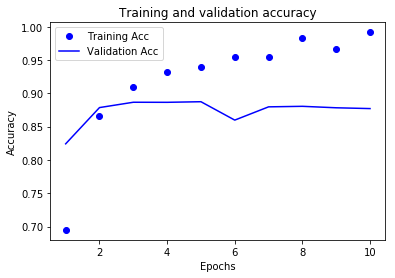

In [7]:
plt.clf()

val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=6,
    batch_size=512
)
results = model.evaluate(x_test, y_test)
results

# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# acc = history_dict['acc']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

Epoch 1/2
25000/25000 [==============================] - 2s 63us/step - loss: 0.6327 - acc: 0.6647
Epoch 2/2
25000/25000 [==============================] - 2s 67us/step


[0.3692894764709473, 0.8736]

In [9]:
model.predict(x_test)

array([[0.05546797],
       [0.99986684],
       [0.24341837],
       ...,
       [0.05802519],
       [0.01023146],
       [0.3605902 ]], dtype=float32)